<a href="https://colab.research.google.com/github/myDSMLProjects/Kaggle_Projects/blob/master/MIT_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 2.1MB 70kB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114586 sha256=44452fd5f468e6c79d272fcdcbfbb370854c3bdc4b080b0566c972e0eb6fa64e
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


## **it is called tensorflow because it handles the flow of tensors which are data structures - arrays of n dimensions**

### **0-d Tensors**

In [3]:
sport = tf.constant('Tennis', tf.string)
numbers = tf.constant(1.41421356237, tf.float64)

print('`sport` is a {}-d Tensor'.format(tf.rank(sport).numpy()))
print('`numbers` is a {}-d Tensor'.format(tf.rank(numbers).numpy()))

`sport` is a 0-d Tensor
`numbers` is a 0-d Tensor


## **1-d Tensors**

vectors and lists can be used to create 1-d tensors

In [4]:
sports = tf.constant(['Tennis', 'Basketball'], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print('sports is a {}-d tensor with shape {}'.format(tf.rank(sports).numpy(), tf.shape(sports)))
print('numners is a {}-d tensor with shape {}'.format(tf.rank(numbers).numpy(), tf.shape(numbers)))

sports is a 1-d tensor with shape [2]
numners is a 1-d tensor with shape [3]


## **2-d Tensors**

**we are going to create 2d (i.e matrices) and higher rank tensors.
in future while dealing with image processing and computer vision we will create 4d tensors. Here the dimensions corresponds to the number of example images in our batch, image height, image width, and the number of color channels**

In [0]:
# Defining a higher-order tensor

''' TODO : Define a 2-d Tensor '''
matrix = tf.constant([[1.0, 2.0, 3.0, 4.0], [5.0, 6.0, 7.0, 8.0]])
# print(tf.rank(matrix).numpy())
assert isinstance(matrix, tf.Tensor), 'matrix must be a tf Tensor object'
assert tf.rank(matrix).numpy() == 2

In [6]:
''' TODO : Define a 4-d Tensor '''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3.
# You can think of these as 10 images where ech image is RGB 256 x 256

images = tf.zeros([10, 256, 256, 3]) # TODO

print(tf.rank(images).numpy())
print(tf.shape(images).numpy().tolist())

assert isinstance(images, tf.Tensor) # Matrix must be a tf Tensor object
assert tf.rank(images).numpy() == 4
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3]

4
[10, 256, 256, 3]


As we have seen the `shape` of a Tensor provides the number of elements in each Tensor dimension. The `shape` is quite useful, and we'll use it often. You can also use slicing to access subtensors within a higher rank tensor

In [7]:
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1,2]

print('row vector  :{}'.format(row_vector.numpy()))
print('column vector : {}'.format(column_vector.numpy()))
print('scalar : {}'.format(scalar.numpy()))

row vector  :[5. 6. 7. 8.]
column vector : [3. 7.]
scalar : 7.0


In [8]:
# Create nodes in the graph and initialize values

a = tf.constant(25)
b = tf.constant(61)

# Add them
c1 = tf.add(a,b)
c2 = a+b  # Tensorflow overrides the `+` operation so thet it is able to act as Tensors

print(c1)
print(c2)

tf.Tensor(86, shape=(), dtype=int32)
tf.Tensor(86, shape=(), dtype=int32)


Notice how we've created a computation graph consisting of TensorFlow operations, and how  the output is a Tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result.

Now let's consider a slightly more complicated example:

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/computation-graph.png)

Here, we take two inputs, `a, b`, and compute an output `e`. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in TensorFlow to construct this computation function:

In [0]:
# Defining Tensor computations

# Construct a simple computation function

def func(a,b):
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)

  return e



In [10]:
a, b = 1.5, 2.5

e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


we called the function to execute the computation graph given some inputs a, b:

Notice how our output is a Tensor with a value defined by the output of the computation, and that the output has no shape as it is a single scalar value

## **Neural Networks in TensorFlow**

We can also define Nueral Networks in TensorFlow using a high level API called Keras that provides a powerful, intuitive fraamework for building and training deep learning models

Lets first consider the simple example of a Perceptron defined by just one DEnse layer

`y=σ(Wx+b)`, where W represents a matrix of weights, b is a bias, x is the input and σ is the sigmoid activation function,  and y is the output.

We can visualize it using the following graph

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/computation-graph-2.png)



Tensors can flow through abstract types called Layers - The building blocks of Neural networks.

Layers implement common neural networks operations,  and are used to update the weights, compute losses,  and define inter_layer activity. We will first define a layer to implement the simple perceptron defined above

In [11]:
# Defining a network Layer

# n_output_nodes : number of output nodes
# input_shape : shape of the input
# x : input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize the parameters : a weight matrix W and bias b
    # Note that the parameter initialization is random
    self.W = self.add_weight('Weight', shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight('bias', shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self, x):
    z = tf.matmul(x, self.W) + self.b
    y = tf.sigmoid(z)

    return y
  
# Since layer parameters are initiated randomly , we will set a random seed fo reproducing the results
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)




[[0.2697859  0.45750418 0.66536945]]
[PASS] test_custom_dense_layer_output


True

Conveniently, TensorFlow has defined a number of LAyers that are commonly used in newural networks , for example a DEnse. Now, instead of using a single layer to define our simple neural network, we'll use the Sequential model fro   keras and a single Dense laye rto define to our network. With the sequential API you can readily create a neural network by stacking together layers like building blocks

In [0]:
# import the related packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define our model
model = Sequential()

# Define a dense (fully connected) layer to compute z

# Remember : Dense layers are defined by parameters W and b
dense_layer = Dense(n_output_nodes, activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)

# or in one line as model.add(Dense(n_output_nodes, activation='sigmoid'))

Thats it. We have defined our model using Sequential API. Now we can test it out using an example input

In [13]:
# Test the model with an example input
x_input = tf.constant([[1,2]], shape=(1,2))

# Feed it to the odel and predict the output
model_output = model(x_input).numpy()

# Model output
print(model_output)

[[0.5607363 0.6566898 0.1249697]]


In addition to defining model using the Sequential API, we can also define neural networks by directly subclassing the model class, which groups of layers together to enable model training and inference''The model class captures what we refer to as model or as a network. Using Subclassing ,we can create a class of our model ,and then define the forward pass through the network using the call function. Subclassing affords the flexibility to define custom layers, custom training loops, custom activation functions and custom models. LEts define the same neural network as above now using Subclassing rather than the Sequential API

In [0]:
### Defining the model using subclassing ###
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  # In init we define the model layers
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    # Our model consists of single Dense layer. Define it
    self.dense_layer = Dense(n_output_nodes, activation='sigmoid')

  def call(self, inputs):
    return self.dense_layer(inputs)   

Just like the model we built using the Sequential API lets test our subclass model using an example input

In [15]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)
x_input = tf.constant([[1,2]], shape=(1,2))

model.call(x_input).numpy()

array([[0.6504887 , 0.47828162, 0.8373661 ]], dtype=float32)

Importantly Subclassing affords us a alot of flexibility to define custom models. For example we can use boolean arguements in the function to specify different bahaviors during the training and inference. Lets suppose under some instances we want our network to simply output the input, without any perturbation. We define a boolean arguement isidentity to control this behavior

In [0]:
# Defining a model using subclassing and specifying custom brhavior

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  # As before in the init we define the Moel's layers
  # since our desird bahavior involvs the forward pass this part remains unchanged

  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    # self.n_output_nodes = n_output_nodes      this is needed if we are building the Layer
    self.dense_layer = Dense(n_output_nodes, activation='sigmoid')

# implement the bahavior where the network outputs the input, unchanged, under control of isidentity argument 
  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity:
      return inputs
    return x

Lets test this bahavior

In [19]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,0], [0,1]], shape=(2,2))

out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity=True)

print('Network output with activation: {}; network identity output: {}'.format(out_activate.numpy(), out_identity.numpy()))


Network output with activation: [[0.7461689  0.7449926  0.53853303]
 [0.6552061  0.28952885 0.6789708 ]]; network identity output: [[1 0]
 [0 1]]


Now that we have known how to define Layers as well as neural networks in TensorFlow using both the Sequential and Subclassing API's we are ready to turn our attention to how actually implement network training with backpropogation

## **Automatic Differenciation in TensorFlow**

Automatic differentiation is one of the most important parts of TensorFlow and is the backborn of training with backpropogation. We'll use the tensorflow gradientTape  tf.GradientTape to trace operations for computing gradients later.

When a forward pass is made through the network, all the forward pass operations get recorded to a 'tape' then, to compute the gradient, the tape is played backwards. By default, the tape is discarded after it is played backwards; this means that a particular tf.GradientTape can only compute one gradient, and the subsequents calls will throw a runtime error. However, we can compute multiple gradients over the same computation by creating a persistant gradient tape

First, we'll look at how we can compute gradients using gradient tape and access them for computation. We difine the simple function y=x*x  and compute the gradient:

In [22]:
# Gradient computation using GradintTape

x = tf.Variable(3.0)

# Initiate the gradientTape
with tf.GradientTape() as tape:
  # Defien the function
  y = x*x

# Access the gradient -- derivative of y wrt x
dy_dx = tape.gradient(y, x)

#assert dy_dx.numpy() == 6.0
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In training neural networks we use differentiation and schotastic gradient descent SGD to optimize a loss function. Now that we have a sense of GradientTape can be used to compute and access derevatives, we'll look at an example where we use automatic differentiation and SGD to find the minimum of $L=(x-x_f)^2$. Here $x_f$ is a variable for a desired value we are trying to optimize for; $L$ represents a loss that we are trying to minimize. While we can clearly solve this problem analytically ($x_{min}=x_f$), considering how we can compute this using `GrdadientTape` sets us up nicely for future where we use gradient descent to optimize the entire neural network losses

Initializing x = [[0.79197717]]


Text(0, 0.5, 'x_value')

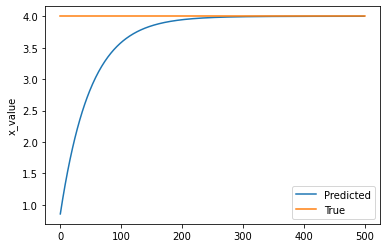

In [37]:
# Function minimization with automatic differentiation and SGD

# Initialize a random value for our initial x

x = tf.Variable([tf.random.normal([1])]) # gives a 2D array with one random normal number of shape (1,1)
print('Initializing x = {}'.format(x.numpy()))

learning_rate = 1e-2 # learning rate fro SGD
history = []

# Define the target value
x_f = 4

# we will run SGD for a number of iterations, we compute the loss,
# compute the derivative of the loss wrt x, and perform the SGD update
for i in range(500):
  with tf.GradientTape() as tape:
    loss = (x - x_f)**2      # "forward pass": records the loss on the tape

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss wrt x
  new_x = x - learning_rate*grad # SGD update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f !
plt.plot(history)
plt.plot([0,500], [x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.ylabel('x_value')

GradientTape provides an extremely flexible framework for automatic differentiation. In order to back propogate errors through a neural network, we track the forward passes on the tape , use this information to determine the gradients, and then use these gradients for optimization using SGD